## Demonstration of clustering on any dataset using DBSCAN Algorithm

<ipython-input-1-d04e1b31d479>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_reduced[dbscan_labels == label][:, 0], X_reduced[dbscan_labels == label][:, 1], s=20, c=colors[i], label=f'Cluster {i + 1}')


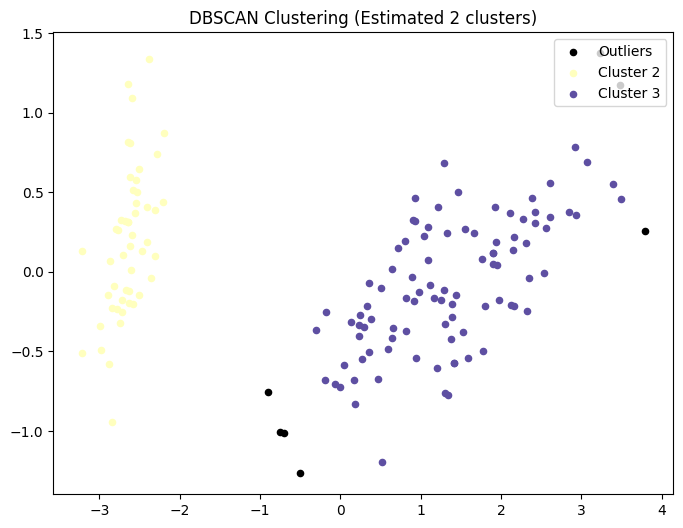

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_reduced)

# Visualize the clustering result
unique_labels = np.unique(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in dbscan_labels else 0)

plt.figure(figsize=(8, 6))

# Create an array of colors for plotting data points
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, n_clusters + 1)]

for i, label in enumerate(unique_labels):
    if label == -1:
        # Outliers are labeled as -1, plot them in black
        plt.scatter(X_reduced[dbscan_labels == label][:, 0], X_reduced[dbscan_labels == label][:, 1], s=20, c='k', label='Outliers')
    else:
        plt.scatter(X_reduced[dbscan_labels == label][:, 0], X_reduced[dbscan_labels == label][:, 1], s=20, c=colors[i], label=f'Cluster {i + 1}')

plt.title(f'DBSCAN Clustering (Estimated {n_clusters} clusters)')
plt.legend(loc='upper right')
plt.show()
